In [1]:
!pwd
# os.chdir('../')
# !pwd

from glob import glob
from matplotlib import pyplot as plt
import numpy as np
import os
from skimage.io import imread
import numpy as np
import pandas as pd
import df_utils
from pytorch_lightning import seed_everything
from sklearn.model_selection import train_test_split

/home/genrev_kiel_hizon/SAR_flood_segmentation/src


## Generate Annotations CSV

In [2]:
seed_everything(42, workers=True)

Global seed set to 42


42

In [3]:
train_df = df_utils.create_df('../data/train/train/')
train_df.head()

,vv_image_path,vh_image_path,flood_label_path,water_body_label_path,region
0,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,bangladesh
1,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,bangladesh
2,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,bangladesh
3,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,bangladesh
4,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,../data/train/train/bangladesh_20170314t115609...,bangladesh


In [4]:
val_df = df_utils.create_df('../data/val_with_ref_labels/test')
val_df.head()

,vv_image_path,vh_image_path,flood_label_path,water_body_label_path,region
0,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence
1,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence
2,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence
3,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence
4,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,../data/val_with_ref_labels/test/florence_2018...,florence


In [5]:
image = imread(train_df.iloc[77]['flood_label_path'], as_gray=True)
np.mean(image)

0.44073486328125

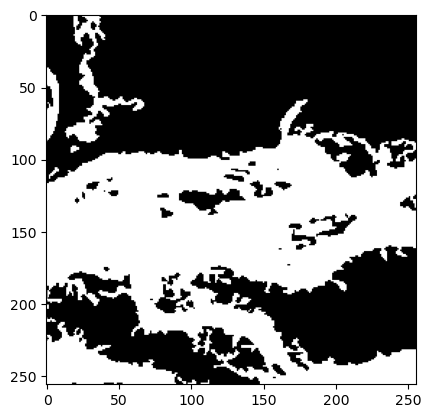

In [6]:
plt.imshow(image, cmap='gray')

## Find images with significant flooding

In [7]:
train_df['has_mask'] = train_df['flood_label_path'].apply(df_utils.has_mask)

In [8]:
val_df['has_mask'] = val_df['flood_label_path'].apply(df_utils.has_mask)

In [9]:
train_df['has_mask'].value_counts()

False    22471
True     10934
Name: has_mask, dtype: int64

In [10]:
val_df['has_mask'].value_counts()

False    7290
True     3110
Name: has_mask, dtype: int64

## Find images where the satellite image is binary (invalid)

In [12]:
train_df['invalid'] = (train_df['vv_image_path'].apply(df_utils.remove_binary))
val_df['invalid'] = (val_df['vv_image_path'].apply(df_utils.remove_binary))

In [90]:
train_df[(train_df['invalid']==True) & (train_df['has_mask']==True)].sample(15)

,vv_image_path,vh_image_path,flood_label_path,water_body_label_path,region,has_mask,invalid
18103,../data/train/train/nebraska_20171222t002118/t...,../data/train/train/nebraska_20171222t002118/t...,../data/train/train/nebraska_20171222t002118/t...,../data/train/train/nebraska_20171222t002118/t...,nebraska,True,True
17437,../data/train/train/nebraska_20171222t002118/t...,../data/train/train/nebraska_20171222t002118/t...,../data/train/train/nebraska_20171222t002118/t...,../data/train/train/nebraska_20171222t002118/t...,nebraska,True,True
13170,../data/train/train/nebraska_20170601t002114/t...,../data/train/train/nebraska_20170601t002114/t...,../data/train/train/nebraska_20170601t002114/t...,../data/train/train/nebraska_20170601t002114/t...,nebraska,True,True
12243,../data/train/train/nebraska_20170601t002114/t...,../data/train/train/nebraska_20170601t002114/t...,../data/train/train/nebraska_20170601t002114/t...,../data/train/train/nebraska_20170601t002114/t...,nebraska,True,True
14875,../data/train/train/nebraska_20170929t002120/t...,../data/train/train/nebraska_20170929t002120/t...,../data/train/train/nebraska_20170929t002120/t...,../data/train/train/nebraska_20170929t002120/t...,nebraska,True,True
14114,../data/train/train/nebraska_20170731t002118/t...,../data/train/train/nebraska_20170731t002118/t...,../data/train/train/nebraska_20170731t002118/t...,../data/train/train/nebraska_20170731t002118/t...,nebraska,True,True
14094,../data/train/train/nebraska_20170731t002118/t...,../data/train/train/nebraska_20170731t002118/t...,../data/train/train/nebraska_20170731t002118/t...,../data/train/train/nebraska_20170731t002118/t...,nebraska,True,True
14895,../data/train/train/nebraska_20170929t002120/t...,../data/train/train/nebraska_20170929t002120/t...,../data/train/train/nebraska_20170929t002120/t...,../data/train/train/nebraska_20170929t002120/t...,nebraska,True,True
15431,../data/train/train/nebraska_20171116t002120/t...,../data/train/train/nebraska_20171116t002120/t...,../data/train/train/nebraska_20171116t002120/t...,../data/train/train/nebraska_20171116t002120/t...,nebraska,True,True
10237,../data/train/train/nebraska_20170508t002113/t...,../data/train/train/nebraska_20170508t002113/t...,../data/train/train/nebraska_20170508t002113/t...,../data/train/train/nebraska_20170508t002113/t...,nebraska,True,True


In [91]:
idx = 18103
vv_img = imread(train_df.iloc[idx]['vv_image_path'], as_gray=True)
vh_img = imread(train_df.iloc[idx]['vh_image_path'], as_gray=True)
label_img = imread(train_df.iloc[idx]['flood_label_path'], as_gray=True)

In [80]:
def visualize(images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()

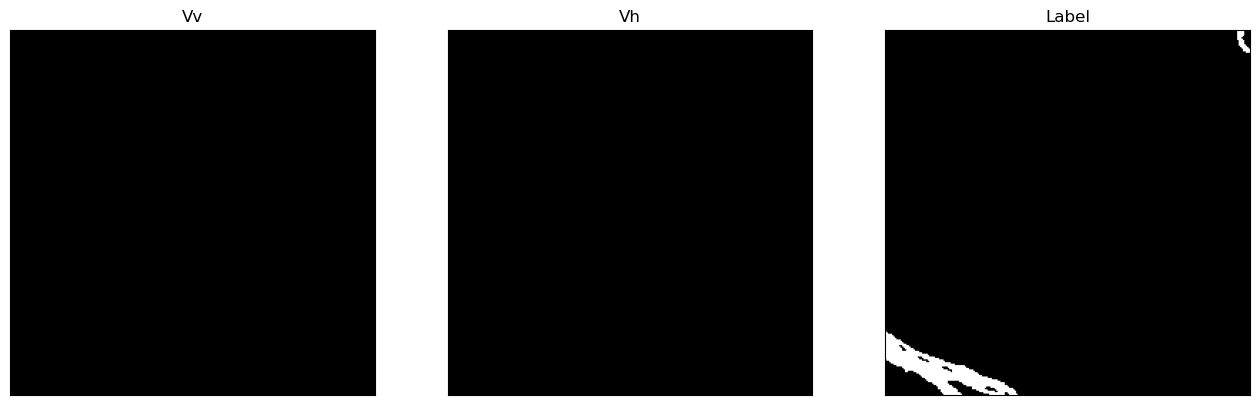

In [92]:
images = {
    'vv': vv_img,
    'vh': vh_img,
    'label': label_img,
}
visualize(images=images)

## Save as csv

In [95]:
train_df.to_csv('../data/train.csv')
val_df.to_csv('../data/val.csv')

## Remove Invalid

In [4]:
val_df = pd.read_csv('../data/val.csv')
train_df = pd.read_csv('../data/train.csv')

In [7]:
train_df = train_df[train_df['invalid']!=True]
val_df = val_df[val_df['invalid']!=True]

## Split val -> val, test

In [18]:
val, test = train_test_split(val_df, stratify=val_df['has_mask'], test_size=0.5)

In [19]:
val.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)

## Save final product to CSV

In [21]:
train_df.to_csv('../data/train.csv')
val.to_csv('../data/val.csv')
test.to_csv('../data/test.csv')